In [1]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

I found 1 face(s) in this photograph.


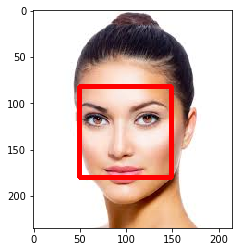

In [2]:
img = cv2.imread("face.jpg")

face_locations = face_recognition.face_locations(img, model="cnn")
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img)

In [3]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [4]:
frame = cv2.imread("face.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

Number of faces detected: 1
[(37, 79) (162, 203)]


Detection 0: Left: 37 Top: 79 Right: 162 Bottom: 203


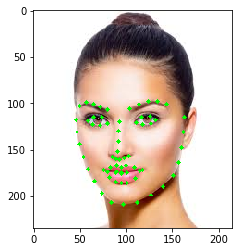

In [5]:

for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape) #객체 내에서 필요한 좌표 정보만 넘파이 객체로 뽑음
        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

imshow("", frame)

In [17]:
# 밑입술 하단
shape[58]

array([ 89, 185])

In [8]:
# 턱끝
shape[9]

array([112, 207])

In [11]:
# 밑입술 하단과 턱끝의 중간지점
pix = (shape[58] + shape[9])*0.5

point1, point2, point3 = pix.round(), ((pix + shape[58])*0.5).round(), ((pix + shape[9])*0.5).round()
print(point1, point2, point3)

[100. 196.] [ 95. 190.] [106. 202.]


In [13]:
from PIL import Image

img = Image.open("face.jpg") 

# RGB 모드로 변경 
rgb_img = img.convert('RGB') 

# 지정한 좌표(1, 400)의 색상을 r,g,b 변수에 넣음 
r1, g1, b1 = rgb_img.getpixel((point1[0], point1[1]))
r2, g2, b2 = rgb_img.getpixel((point2[0], point2[1])) 
r3, g3, b3 = rgb_img.getpixel((point3[0], point3[1])) 

print(r1, g1, b1)
print(r2, g2, b2)
print(r3, g3, b3)

252 219 204
244 203 185
235 171 127


In [14]:
import colorsys

# RGB -> HSV
def revised_rgb_to_hsv(r, g, b):
    (h, s, v) = colorsys.rgb_to_hsv(r/255, g/255, b/255)
    h *= 360
    s *= 100
    v *= 100
    return round(h), round(s), round(v)

In [16]:
h1, s1, v1 = revised_rgb_to_hsv(r1, g1, b1)
h2, s2, v2 = revised_rgb_to_hsv(r2, g2, b2)
h3, s3, v3 = revised_rgb_to_hsv(r3, g3, b3)

print(h1, s1, v1)
print(h2, s2, v2)
print(h3, s3, v3)

19 19 99
18 24 96
24 46 92
